# Week 4 - Code for Figures

In [1]:
!pip install brian2
from brian2 import *


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## STDP / Latency reduction

This illustrates the input stimuli in [Song et al. (2000) "Competitive Hebbian learning through spike-timing-dependent synaptic plasticity"](https://doi.org/10.1038/78829). Note that this uses onsets instead of synaptic delays, and the onsets are grouped to make it clearer what is going on.

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


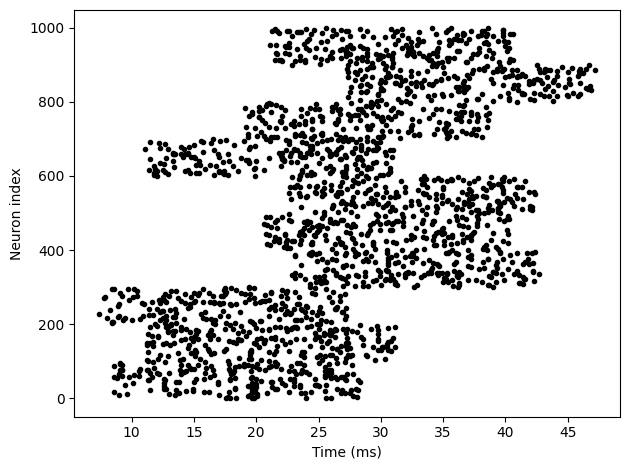

In [2]:
eqs = '''
onset : second
rate = int(t>onset and t<onset+20*ms)*100*Hz : Hz
'''
N = 1000
groupsize = 100
G = NeuronGroup(N, eqs, threshold='rand()<rate*dt')
G.onset = repeat(rand(N//groupsize)*30, groupsize)*ms
M = SpikeMonitor(G)
run(100*ms)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
tight_layout();

## STDP / Correlated groups

This illustrates the input spike patterns for the following paper:

[Song and Abbott (2001) "Cortical Development and Remapping through Spike Timing-Dependent Plasticity"](https://doi.org/10.1016/S0896-6273(01)00451-2)

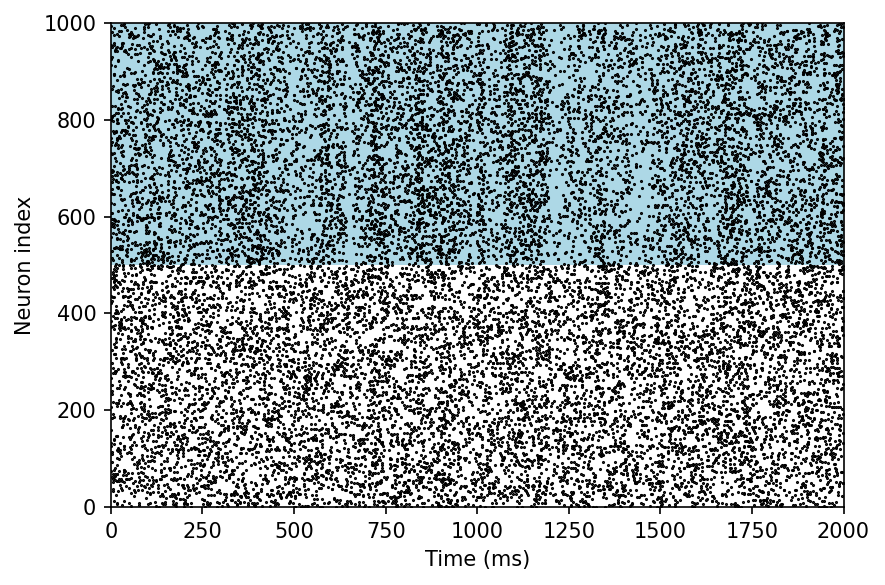

In [3]:
from numpy.random import exponential
eqs = '''
a : 1
y : 1
corrgroup = int(i>=500) : 1
rate_corr = 10*Hz*(1+0.3*a+0.3*y) : Hz
rate_uncorr = 10*Hz*(1+0.3*sqrt(2)*a) : Hz
rate = corrgroup*rate_corr+(1-corrgroup)*rate_uncorr : Hz
'''
N = 1000
G = NeuronGroup(N, eqs, threshold='rand()<rate*dt')
# G.corrgroup[:500] = 1
t = 0*second
M = SpikeMonitor(G)
tmax = 2000*ms
while t<tmax:
    duration = exponential(20)*ms
    G.a = randn(N)
    G.y = randn()
    run(duration)
    t += duration
figure(figsize=(6, 4), dpi=150)
plot(M.t/ms, M.i, '.k', ms=1)
fill([0, tmax/ms, tmax/ms, 0], [500, 500, 1000, 1000], 'lightblue')
xlim(0, tmax/ms)
ylim(0, 1000)
xlabel('Time (ms)')
ylabel('Neuron index')
tight_layout();